#import pandas dataset
#Data description
1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumption in miles per gallon,
    to be predicted in terms of 3 multivalued discrete and 5 continuous
    attributes." (Quinlan, 1993)

5. Number of Instances: 398

6. Number of Attributes: 9 including the class attribute

7. Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

8. Missing Attribute Values:  horsepower has 6 missing values



In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1MtrVmFo-lHCrg151Q2NMcFAsOB7EkkyJ'
file_name= 'auto-mpg.csv'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(file_name)

     |████████████████████████████████| 993kB 2.8MB/s 


#Step 1:Data Collection

In [0]:
data= pd.read_csv(file_name, na_values='?')


#Step 2: Data exploration

Let's have a look at the data

In [30]:
data

,mpg,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,18.0,307.0,130.0,3504,12.0,70,0,0,0,0,1,1,0,0
1,15.0,350.0,165.0,3693,11.5,70,0,0,0,0,1,1,0,0
2,18.0,318.0,150.0,3436,11.0,70,0,0,0,0,1,1,0,0
3,16.0,304.0,150.0,3433,12.0,70,0,0,0,0,1,1,0,0
4,17.0,302.0,140.0,3449,10.5,70,0,0,0,0,1,1,0,0
5,15.0,429.0,198.0,4341,10.0,70,0,0,0,0,1,1,0,0
6,14.0,454.0,220.0,4354,9.0,70,0,0,0,0,1,1,0,0
7,14.0,440.0,215.0,4312,8.5,70,0,0,0,0,1,1,0,0
8,14.0,455.0,225.0,4425,10.0,70,0,0,0,0,1,1,0,0
9,15.0,390.0,190.0,3850,8.5,70,0,0,0,0,1,1,0,0


# Variable Identification

In [4]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


#Univariate Analysis

In [6]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
data.describe(include=['object'], exclude=['float64'])

,car name
count,398
unique,305
top,ford pinto
freq,6


#Data preprocessing

#Drop columns

In [0]:
data.drop(axis=1, columns= ['car name'], inplace=True)


Here we drop the colunm car name because it is not so much necesary for our problem.

#Categorical data handling

In [0]:
cat_cols = ['cylinders', 'origin']

we observe our dataset and find that we have two categorical column. they are cylinders and origin.

In [10]:
data['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [11]:
data['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [12]:
data = pd.get_dummies(data, columns=cat_cols, prefix=cat_cols)

data

,mpg,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,18.0,307.0,130.0,3504,12.0,70,0,0,0,0,1,1,0,0
1,15.0,350.0,165.0,3693,11.5,70,0,0,0,0,1,1,0,0
2,18.0,318.0,150.0,3436,11.0,70,0,0,0,0,1,1,0,0
3,16.0,304.0,150.0,3433,12.0,70,0,0,0,0,1,1,0,0
4,17.0,302.0,140.0,3449,10.5,70,0,0,0,0,1,1,0,0
5,15.0,429.0,198.0,4341,10.0,70,0,0,0,0,1,1,0,0
6,14.0,454.0,220.0,4354,9.0,70,0,0,0,0,1,1,0,0
7,14.0,440.0,215.0,4312,8.5,70,0,0,0,0,1,1,0,0
8,14.0,455.0,225.0,4425,10.0,70,0,0,0,0,1,1,0,0
9,15.0,390.0,190.0,3850,8.5,70,0,0,0,0,1,1,0,0


#Missing value treatment

In [13]:
data.isna().sum()

mpg             0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
cylinders_3     0
cylinders_4     0
cylinders_5     0
cylinders_6     0
cylinders_8     0
origin_1        0
origin_2        0
origin_3        0
dtype: int64

In [14]:
data.isna().sum()

mpg             0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
cylinders_3     0
cylinders_4     0
cylinders_5     0
cylinders_6     0
cylinders_8     0
origin_1        0
origin_2        0
origin_3        0
dtype: int64

yeah! Now we see that we have no missing values. 

In [15]:
print("""
No of columns: {}
No of rows: {}
No of categorical columns: {}
No of numerical columns: {}""".format(data.shape[1], 
                                      data.shape[0],
                                      len(data.select_dtypes('O').columns),
                                      len(data.select_dtypes(['int', 'float']).columns)))


No of columns: 14
No of rows: 398
No of categorical columns: 0
No of numerical columns: 6


WOW. We see that we have no categorial column. 

Let's have a descriptive statistical tables of the numeric columns.

In [16]:
num_cols = data.select_dtypes(['int', 'float']).columns
data[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [0]:
data['horsepower']=data['horsepower'].fillna(data['horsepower'].median())

#Data Visualization

<Figure size 432x288 with 0 Axes>

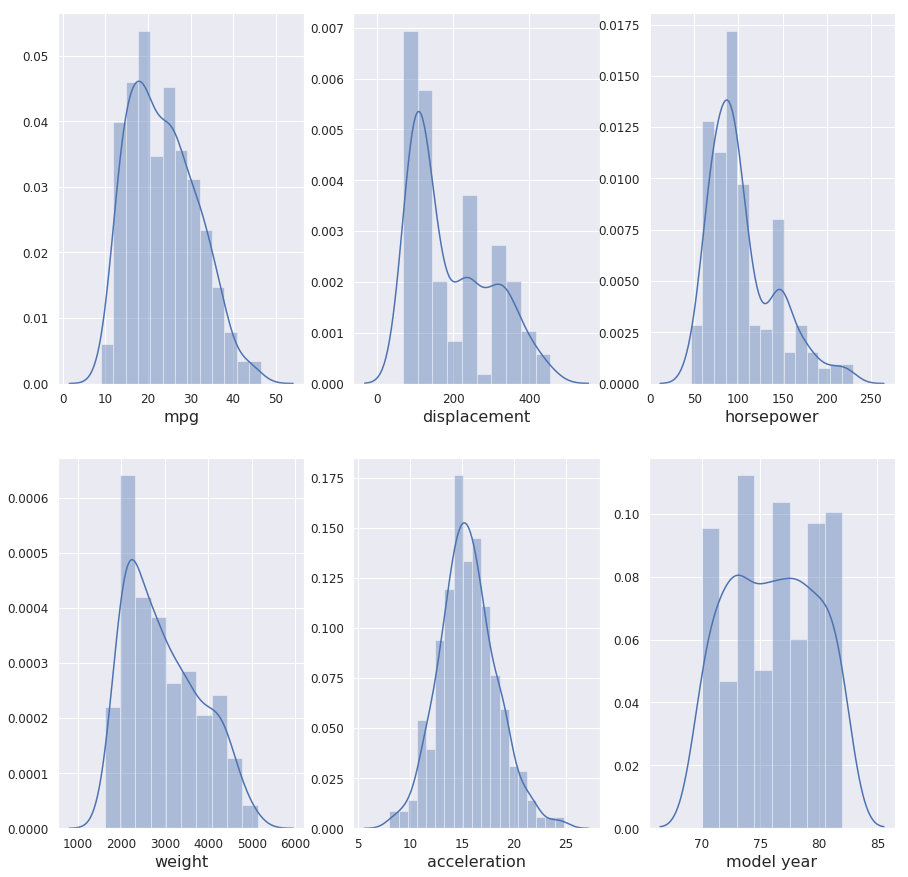

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(15,15))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.distplot(tuple(data[feature]))
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_distribution(data, num_cols)

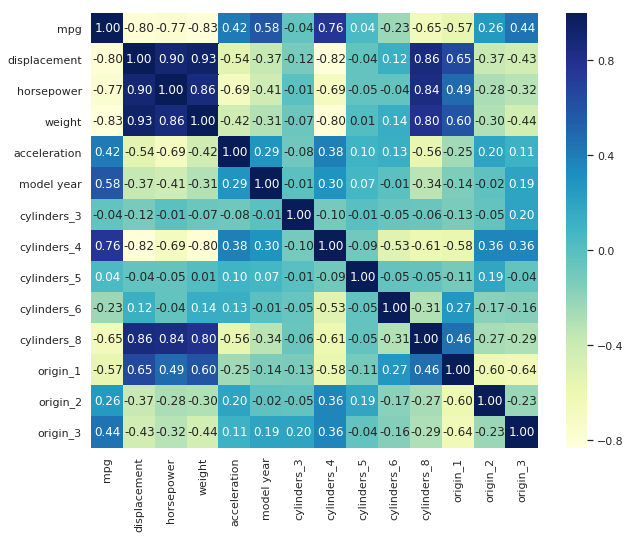

In [19]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".2f", cmap="YlGnBu");

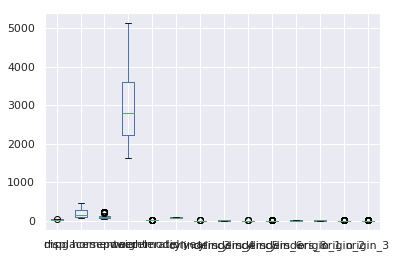

In [20]:
data.plot.box();

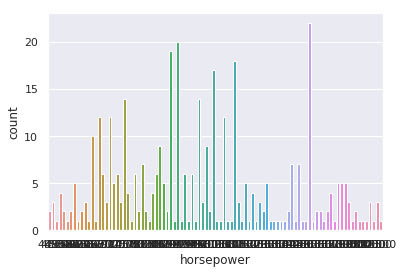

In [21]:
plot = sns.countplot(data["horsepower"])

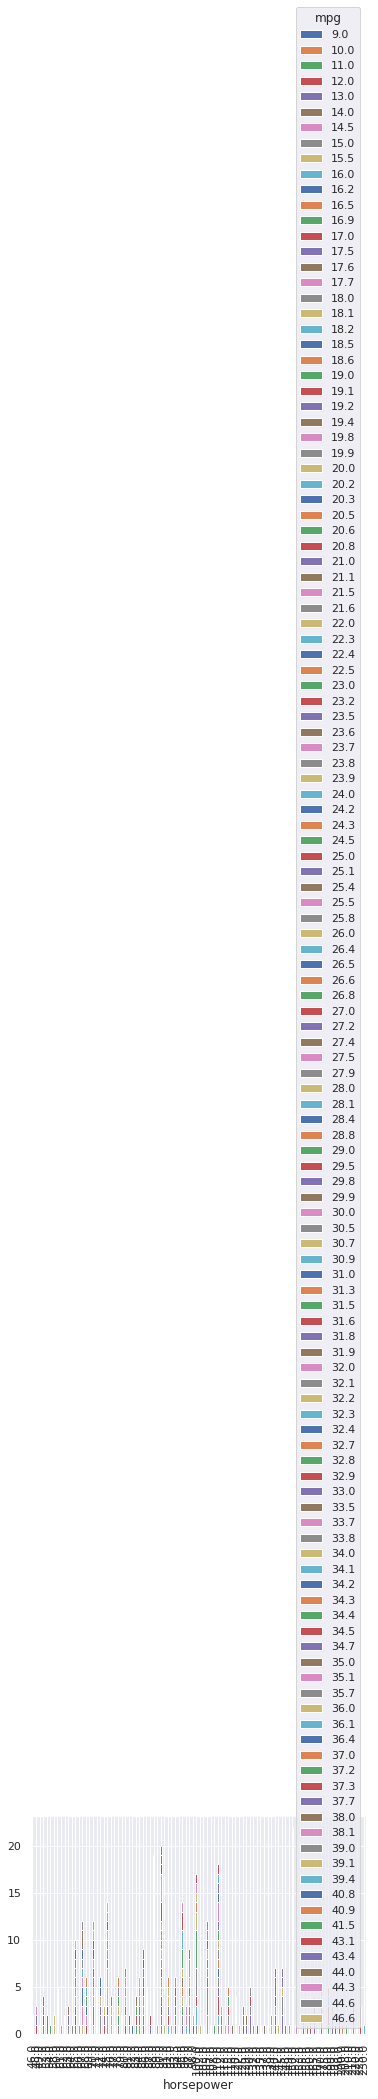

In [22]:
plot = (data
        .groupby(['horsepower', 'mpg'])
        .size()
        .unstack()
        .plot
        .bar(stacked=True))

#Data segregation

In [0]:
X = data.loc[:, data.columns!='mpg']
y = data.loc[:, data.columns=='mpg']

In [0]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
scaler.fit(X.values)
X_standered = scaler.transform(X.values)
X_scaled = pd.DataFrame(X_standered, columns=X.columns)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=1234)

print("""
X_train has {} data points.
y_train has {} data points.
X_test has {} data points.
y_test has {} data points.
""".format(X_train.shape[0], y_train.shape[0], X_test.shape[0], y_test.shape[0]))


X_train has 318 data points.
y_train has 318 data points.
X_test has 80 data points.
y_test has 80 data points.



In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

#Step 4: Modeling

In [27]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Step 5:Validation

In [0]:
y_pred = lr_model.predict(X_test)

In [29]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print("The R^2 score is {}".format(r2))

The R^2 score is 0.843344454373419


Finally. We can get an accuracy that is 84.33%